# **Introduction**

In this notebook, we use Convolutional Neural Networks (ConvNets or CNNs) to classify the handwritten digits. We will use the same MNIST data that we used in our previous example. But this time will be using the *tensorflow* library.

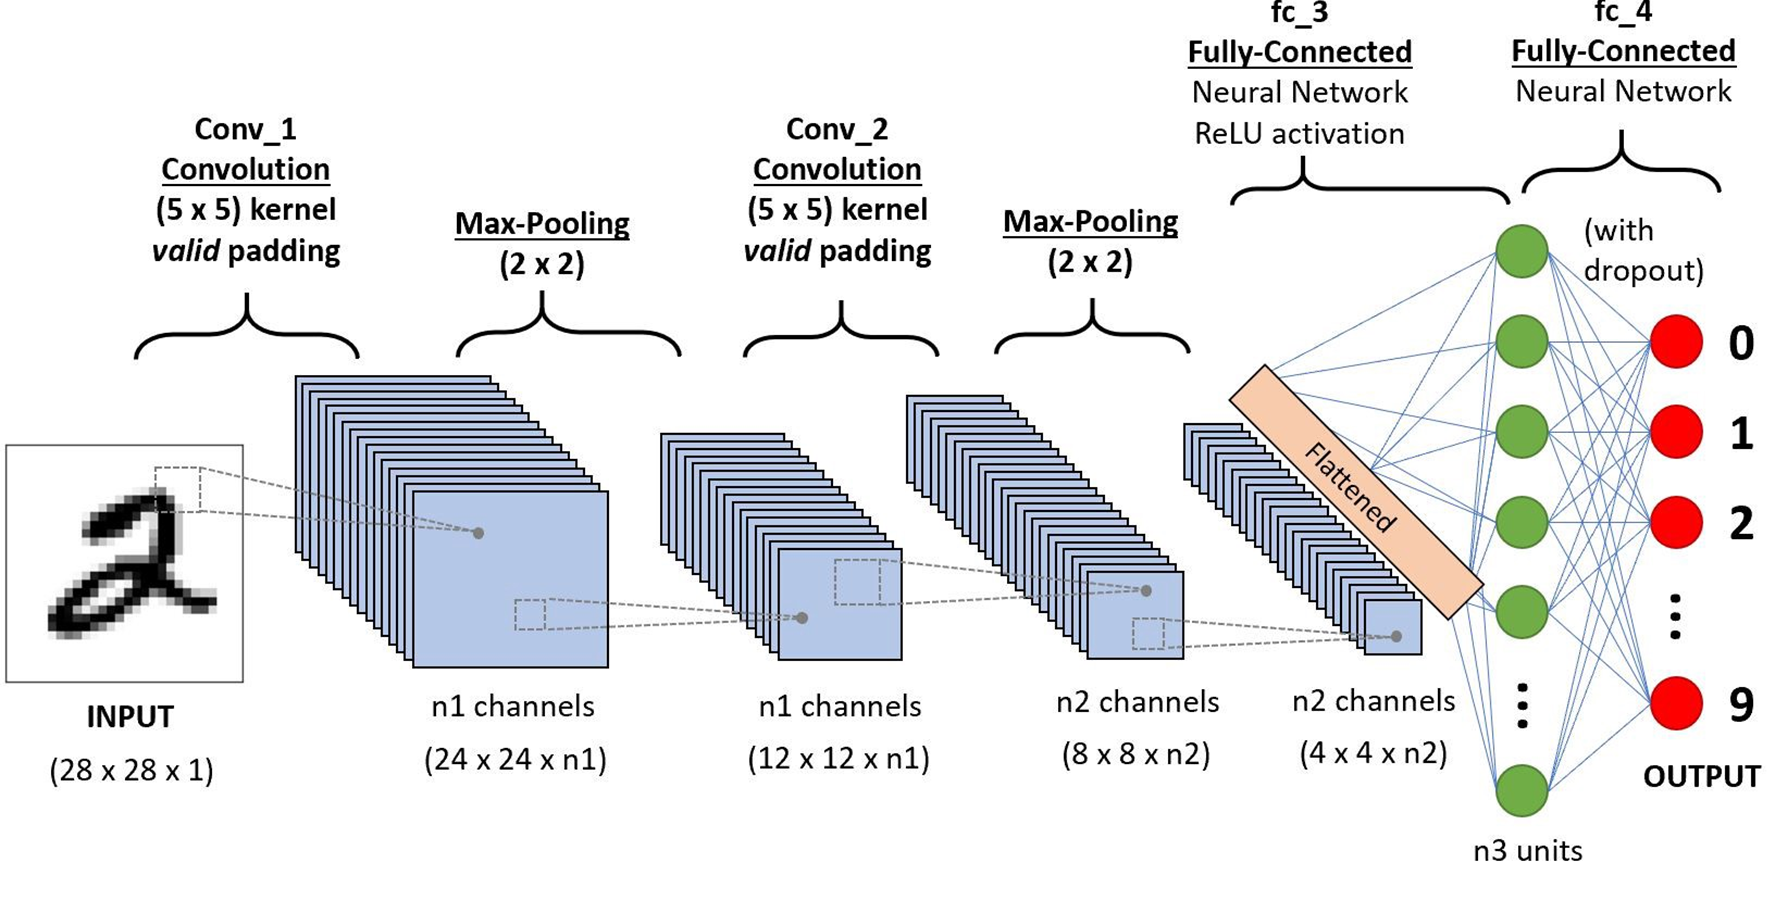

# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# **Loading the dataset**

In [2]:
df_data = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
print(df_data.shape)

(20000, 785)


In [16]:
num_classes = 10
X = df_data.iloc[:, 1:].values
y = df_data.iloc[:,0].values
X = X/255.0 # Normalizing the input images between 0-1


X = X.reshape(-1, 28,28,1) # Convert the images back to 28 x 28 pixels
y = tf.keras.utils.to_categorical(y, num_classes) # convert class vectors to binary class matrices

print(X.shape)
print(y.shape)

(20000, 28, 28, 1)
(20000, 10)


# **Spliting into training and validation**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=0, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(14000, 28, 28, 1)
(14000, 10)
(6000, 28, 28, 1)
(6000, 10)


# **Tensorflow**

In [6]:
import tensorflow as tf

from tensorflow.keras import layers, models

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [18]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
110/110 [==============================] - 17s 142ms/step - loss: 0.7210 - accuracy: 0.8039 - val_loss: 0.2382 - val_accuracy: 0.9280
Epoch 2/15
110/110 [==============================] - 15s 131ms/step - loss: 0.1822 - accuracy: 0.9444 - val_loss: 0.1326 - val_accuracy: 0.9570
Epoch 3/15
110/110 [==============================] - 14s 130ms/step - loss: 0.1187 - accuracy: 0.9662 - val_loss: 0.1026 - val_accuracy: 0.9675
Epoch 4/15
110/110 [==============================] - 14s 126ms/step - loss: 0.0932 - accuracy: 0.9724 - val_loss: 0.1025 - val_accuracy: 0.9682
Epoch 5/15
110/110 [==============================] - 14s 126ms/step - loss: 0.0753 - accuracy: 0.9778 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 6/15
110/110 [==============================] - 14s 125ms/step - loss: 0.0644 - accuracy: 0.9813 - val_loss: 0.0780 - val_accuracy: 0.9752
Epoch 7/15
110/110 [==============================] - 14s 125ms/step - loss: 0.0521 - accuracy: 0.9849 - val_loss: 0.0700 - val_ac

# **Training and validation accuracy and loss**

Text(0.5, 1.0, 'Accuracy')

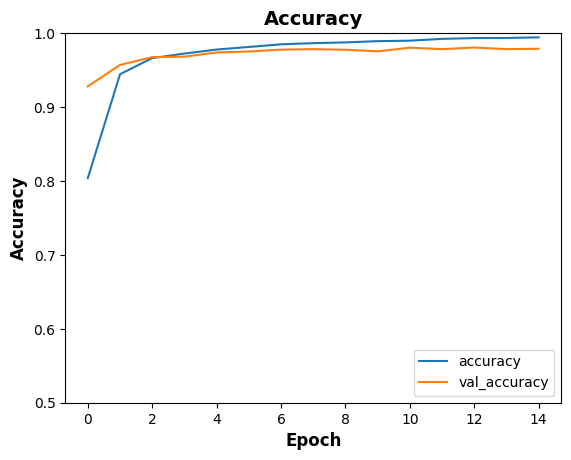

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Accuracy', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Loss')

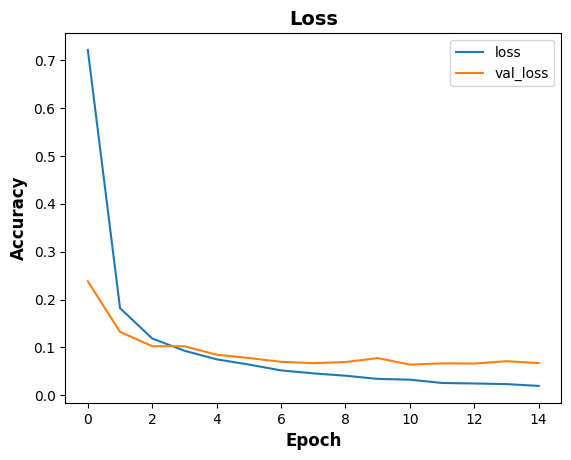

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')
plt.title('Loss', fontsize=14, fontweight='bold')

In [32]:
y_train1 = np.argmax(y_train, axis=1) # converting the output back to categorical
y_val1 = np.argmax(y_val, axis=1) # converting the output back to categorical

y_pred_train = np.argmax(model.predict(X_train, verbose=2),axis=1) # Prediction on training data
y_pred_val = np.argmax(model.predict(X_val, verbose=2),axis=1) # Prediction on validation data

acc_train = (y_pred_train == y_train1).sum() / len(y_train1)
acc_val = (y_pred_val == y_val1).sum() / len(y_val1)

print('Accuracy on Training set = {:.2f} %'.format(acc_train * 100))
print('\n')
print('Accuracy on Validation set = {:.2f} %'.format(acc_val * 100))

438/438 - 4s - 4s/epoch - 8ms/step
188/188 - 2s - 2s/epoch - 13ms/step
Accuracy on Training set = 99.71 %


Accuracy on Validation set = 97.88 %


# **Confusion Matrices**

In [33]:
## Your code here

# **Testing on unseen data**

In [44]:
df_test = pd.read_csv('sample_data/mnist_test.csv')

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:,0].values

X_test = X_test/255.0 # Normalizing the input images between 0-1
X_test = X_test.reshape(-1, 28,28,1) # Convert the images back to 28 x 28 pixels

print(X_test.shape)
print(y_test.shape)

(9999, 28, 28, 1)
(9999,)


In [45]:
y_pred_test = np.argmax(model.predict(X_test), axis=1) # Prediction on test data

acc_test = (y_pred_test == y_test).sum() / len(y_test)

print('Accuracy on Testing set = {:.2f} %'.format(acc_test * 100))

313/313 [==============================] - 3s 9ms/step
Accuracy on Testing set = 98.31 %


# **Visualizing incorrect predictions**

In [69]:
incorrect = np.where(y_test!=y_pred_test)[0]

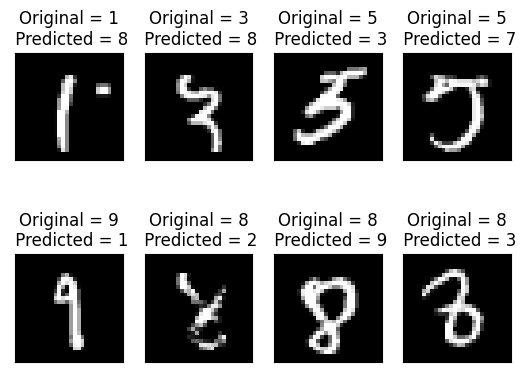

In [71]:
idx = np.random.randint(len(incorrect), size=8)

rand_samples = incorrect[idx] # randomly select 8 incorrect images
for i in range(len(rand_samples)):
  img = X_test[rand_samples[i], :,:,:]
  img = img.reshape(28,28) # reshaping to 28 x 28 images
  digit = plt.subplot(2,4, i+1)
  digit.imshow(img, cmap='gray')
  digit.set_xticks(())
  digit.set_yticks(())
  digit.set_title('Original = {}\n Predicted = {}'.format(y_test[rand_samples[i]], y_pred_test[rand_samples[i]]))
plt.show()